<a href="https://colab.research.google.com/github/Saivkumar/SaivKumar/blob/main/Breast_Cancer_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Essential Libraries for TSNE**

In [1]:
%%capture
!pip install bioinfokit

In [17]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

**Loading Dataset**

In [3]:

df = pd.read_csv('/content/Breast Cancer Dataset.zip')

In [4]:
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


Above dataset can be used in predicting Breast Cancer type based on expression levels of specific genes or probes. These features are used as inputs to the model to predict the Breast Cancer Type

**Drping Useless Column**

In [5]:
df3=df.drop('samples',axis=1)

In [6]:
df3

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [7]:
df4=pd.get_dummies(df3,columns=['type'],dtype=int)

In [8]:
df4

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type_HER,type_basal,type_cell_line,type_luminal_A,type_luminal_B,type_normal
0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,...,4.901594,2.966657,3.508495,3.301999,0,1,0,0,0,0
1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,...,5.405839,2.934763,3.687666,3.064299,0,1,0,0,0,0
2,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,...,5.184286,2.847684,3.550597,3.158535,0,1,0,0,0,0
3,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,5.086569,3.031602,3.524981,3.272665,0,1,0,0,0,0
4,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,3.368243,...,5.235318,2.956232,3.445501,3.193947,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,4.126711,...,6.209136,2.852852,3.697448,3.333289,0,0,0,0,1,0
147,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,3.735215,...,7.108210,2.929800,3.833289,3.213893,0,0,0,0,1,0
148,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,3.718392,...,7.329545,3.085127,3.628848,3.215807,0,0,0,0,1,0
149,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,4.148290,...,7.089259,3.018525,3.770597,3.102298,0,0,0,0,1,0


**Split-out validation dataset**

In [9]:
array = df4.values

**Separating Array into input and output Components**

In [10]:
X = array[:,:-6]
Y = array[:,-6:]

**TSNE Visualization**

In [11]:
#TSNE visualization
from bioinfokit.visuz import cluster


model = TSNE(2)
model.fit(X)
#data_tsne = model.transform(X)

data_tsne = TSNE(n_components=2).fit_transform(X)
cluster.tsneplot(score=data_tsne)

In [12]:
# get a list of categories
color_class = df4[['type_HER', 'type_basal', 'type_cell_line', 'type_luminal_A', 'type_luminal_B', 'type_normal']].idxmax(axis=1).to_numpy()
cluster.tsneplot(score=data_tsne, colorlist=color_class, legendpos='upper right')
#Plot will be stored in the default directory


In [13]:
unique_classes = np.unique(color_class)  # ['type_HER', 'type_basal', ..., 'type_normal']
class_to_num = {cls: i for i, cls in enumerate(unique_classes)}  # {'type_HER': 0, 'type_basal': 1, ..., 'type_normal': 5}
colorlist = np.array([class_to_num[cls] for cls in color_class])

In [14]:
score = np.random.rand(len(colorlist), 2) * 100  # Random data for demonstration

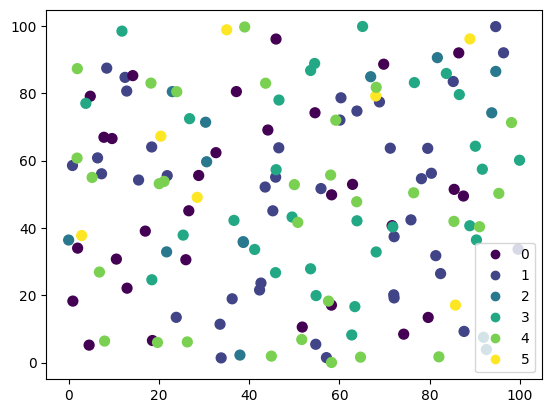

In [18]:
# Plotting the scatter plot
scatter = plt.scatter(score[:, 0], score[:, 1], c=colorlist, cmap='viridis', s=50)
# Adding a legend
plt.legend(*scatter.legend_elements(), loc='best')

# Display the plot
plt.show()

In [19]:
data_tsne

array([[-4.62204075e+00, -8.81740379e+00],
       [-3.80049372e+00, -9.46802139e+00],
       [-5.59668922e+00, -9.08957005e+00],
       [-2.97988391e+00, -7.99165630e+00],
       [-3.37408137e+00, -8.29958439e+00],
       [-1.56405973e+00, -8.06851768e+00],
       [-5.11338615e+00, -1.01413345e+01],
       [-3.60576010e+00, -8.45324802e+00],
       [-3.83562708e+00, -9.01560020e+00],
       [-3.89048147e+00, -8.13452816e+00],
       [-2.51796722e+00, -9.35830212e+00],
       [-6.14757252e+00, -5.03757334e+00],
       [-1.19110298e+00, -3.90588140e+00],
       [-3.97401333e+00, -6.93444252e+00],
       [-6.19815111e+00, -5.10485744e+00],
       [-5.16436863e+00, -6.22007084e+00],
       [-6.52326870e+00, -4.50090837e+00],
       [-5.79790020e+00, -7.25124311e+00],
       [-4.99331903e+00, -4.69131613e+00],
       [-3.59347582e+00, -6.74777842e+00],
       [-7.20996952e+00, -7.60753965e+00],
       [-3.02035069e+00, -4.38744450e+00],
       [-5.04050779e+00, -7.76693916e+00],
       [-2.